In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NEEL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NEEL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [87]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [88]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data Cleaning

In [89]:
df.shape

(5572, 5)

In [90]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Removing last 3 columns as we dont need them

In [91]:
df = df.iloc[:,:-3]

In [92]:
df.columns = ['target' , 'text']

In [93]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [99]:
df['target'] = df['target'].apply(lambda x : 1 if x == 'spam' else 0)

In [100]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [101]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [102]:
df.duplicated().sum()

0

In [103]:
df.drop_duplicates(keep='first',inplace=True)
df.duplicated().sum()

0

In [104]:
df.shape

(5169, 2)

# Exploratory Data Analysis

In [85]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

([<matplotlib.patches.Wedge at 0x2067b4387f0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'Ham'),
  Text(1.014499764949479, -0.4251943401757036, 'Spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

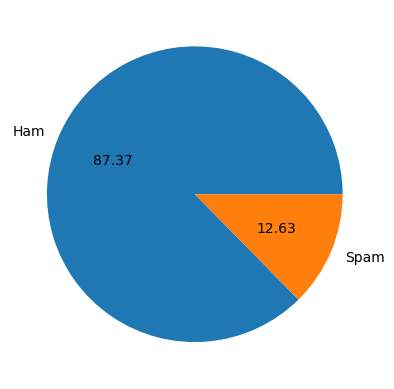

In [114]:
plt.pie(df['target'].value_counts(),labels=['Ham','Spam'],autopct='%0.2f')

In [118]:
df['numchar'] = df['text'].apply(len)
df.head()

,target,text,numchar
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [123]:
df['numword'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [124]:
df.head()

,target,text,numchar,numword
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [125]:
df['numsent'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [126]:
df.head()

,target,text,numchar,numword,numsent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [131]:
df.iloc[:,2:].describe()

,numchar,numword,numsent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


Almost 79 characters, 18 words and 2 sentences are used in each of the message.

In [134]:
df[df['target']==0].iloc[:,2:].describe()

,numchar,numword,numsent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [135]:
df[df['target']==1].iloc[:,2:].describe()

,numchar,numword,numsent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


We can see that spam messages contain around 67 more characters, 10 more words and 1 more sentence tham ham messages on an average

<AxesSubplot:xlabel='numchar', ylabel='Count'>

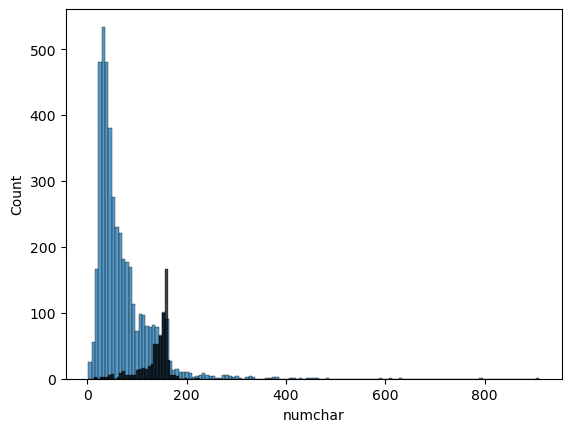

In [141]:
sns.histplot(df[df['target']==0]['numchar'])
sns.histplot(df[df['target']==1]['numchar'],color='black')

<AxesSubplot:xlabel='numword', ylabel='Count'>

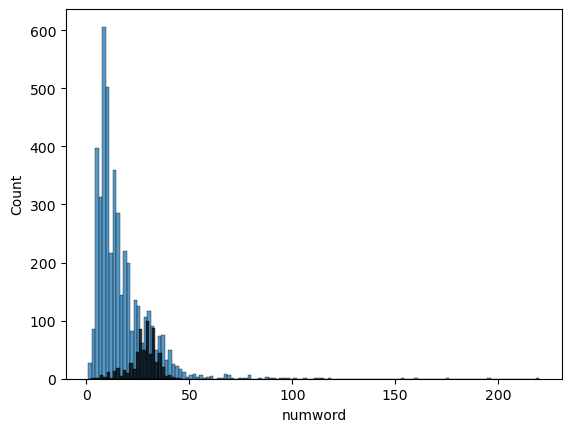

In [143]:
sns.histplot(df[df['target']==0]['numword'])
sns.histplot(df[df['target']==1]['numword'],color='black')

<AxesSubplot:xlabel='numsent', ylabel='Count'>

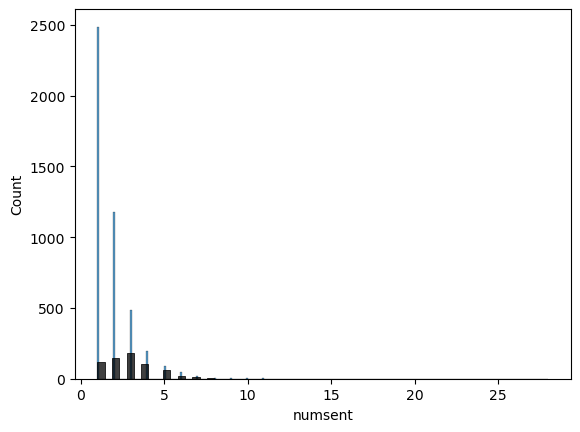

In [144]:
sns.histplot(df[df['target']==0]['numsent'])
sns.histplot(df[df['target']==1]['numsent'],color='black')

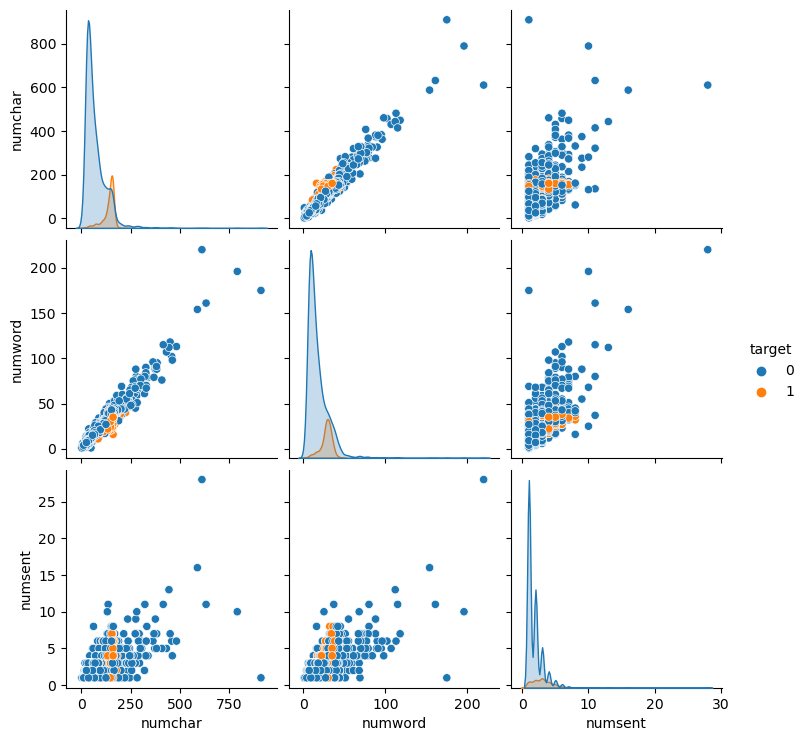

In [147]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

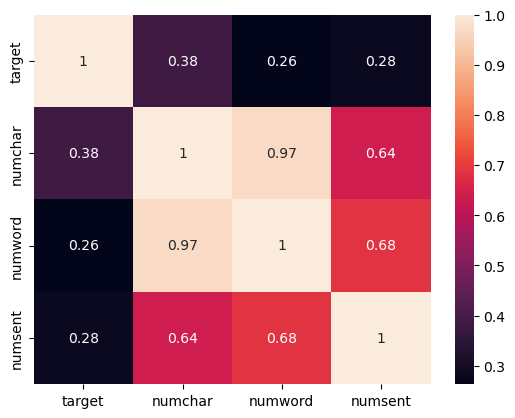

In [148]:
sns.heatmap(df.corr(),annot=True)

Heatmap shows us multicollinearity between independent variables. Since we need to keep only 1 independent variable, we are going forth with number of characters as it displays high collinearity with our target variable which is to our advantage.

In [150]:
df.drop(['numword','numsent'],axis = 1,inplace=True)
df.head()

,target,text,numchar
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [164]:
ps = PorterStemmer()


In [167]:
def process_text (x):
    x = x.lower()
    x = nltk.word_tokenize(x)
    y = []
    for i in x:
        if i.isalnum():
            y.append(i)
    x = y[:]
    y.clear()
    for i in x :
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    x = y[:]
    y.clear()
    for i in x:
        y.append(ps.stem(i))
    return ' '.join(y)

In [168]:
process_text('I loved the lectures on machine learning')

'love lectur machin learn'

In [170]:
df['cleantext'] = df['text'].apply(process_text)
df.head()

,target,text,numchar,cleantext
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


In [172]:
!pip install wordcloud

     -------------------------------------- 153.3/153.3 kB 3.0 MB/s eta 0:00:00


In [173]:
from wordcloud import WordCloud

In [192]:
wc = WordCloud(width = 1000 , height = 1000 , min_font_size = 10,background_color='white')
spam = wc.generate(df[df['target'] == 1]['cleantext'].str.cat(sep=' '))

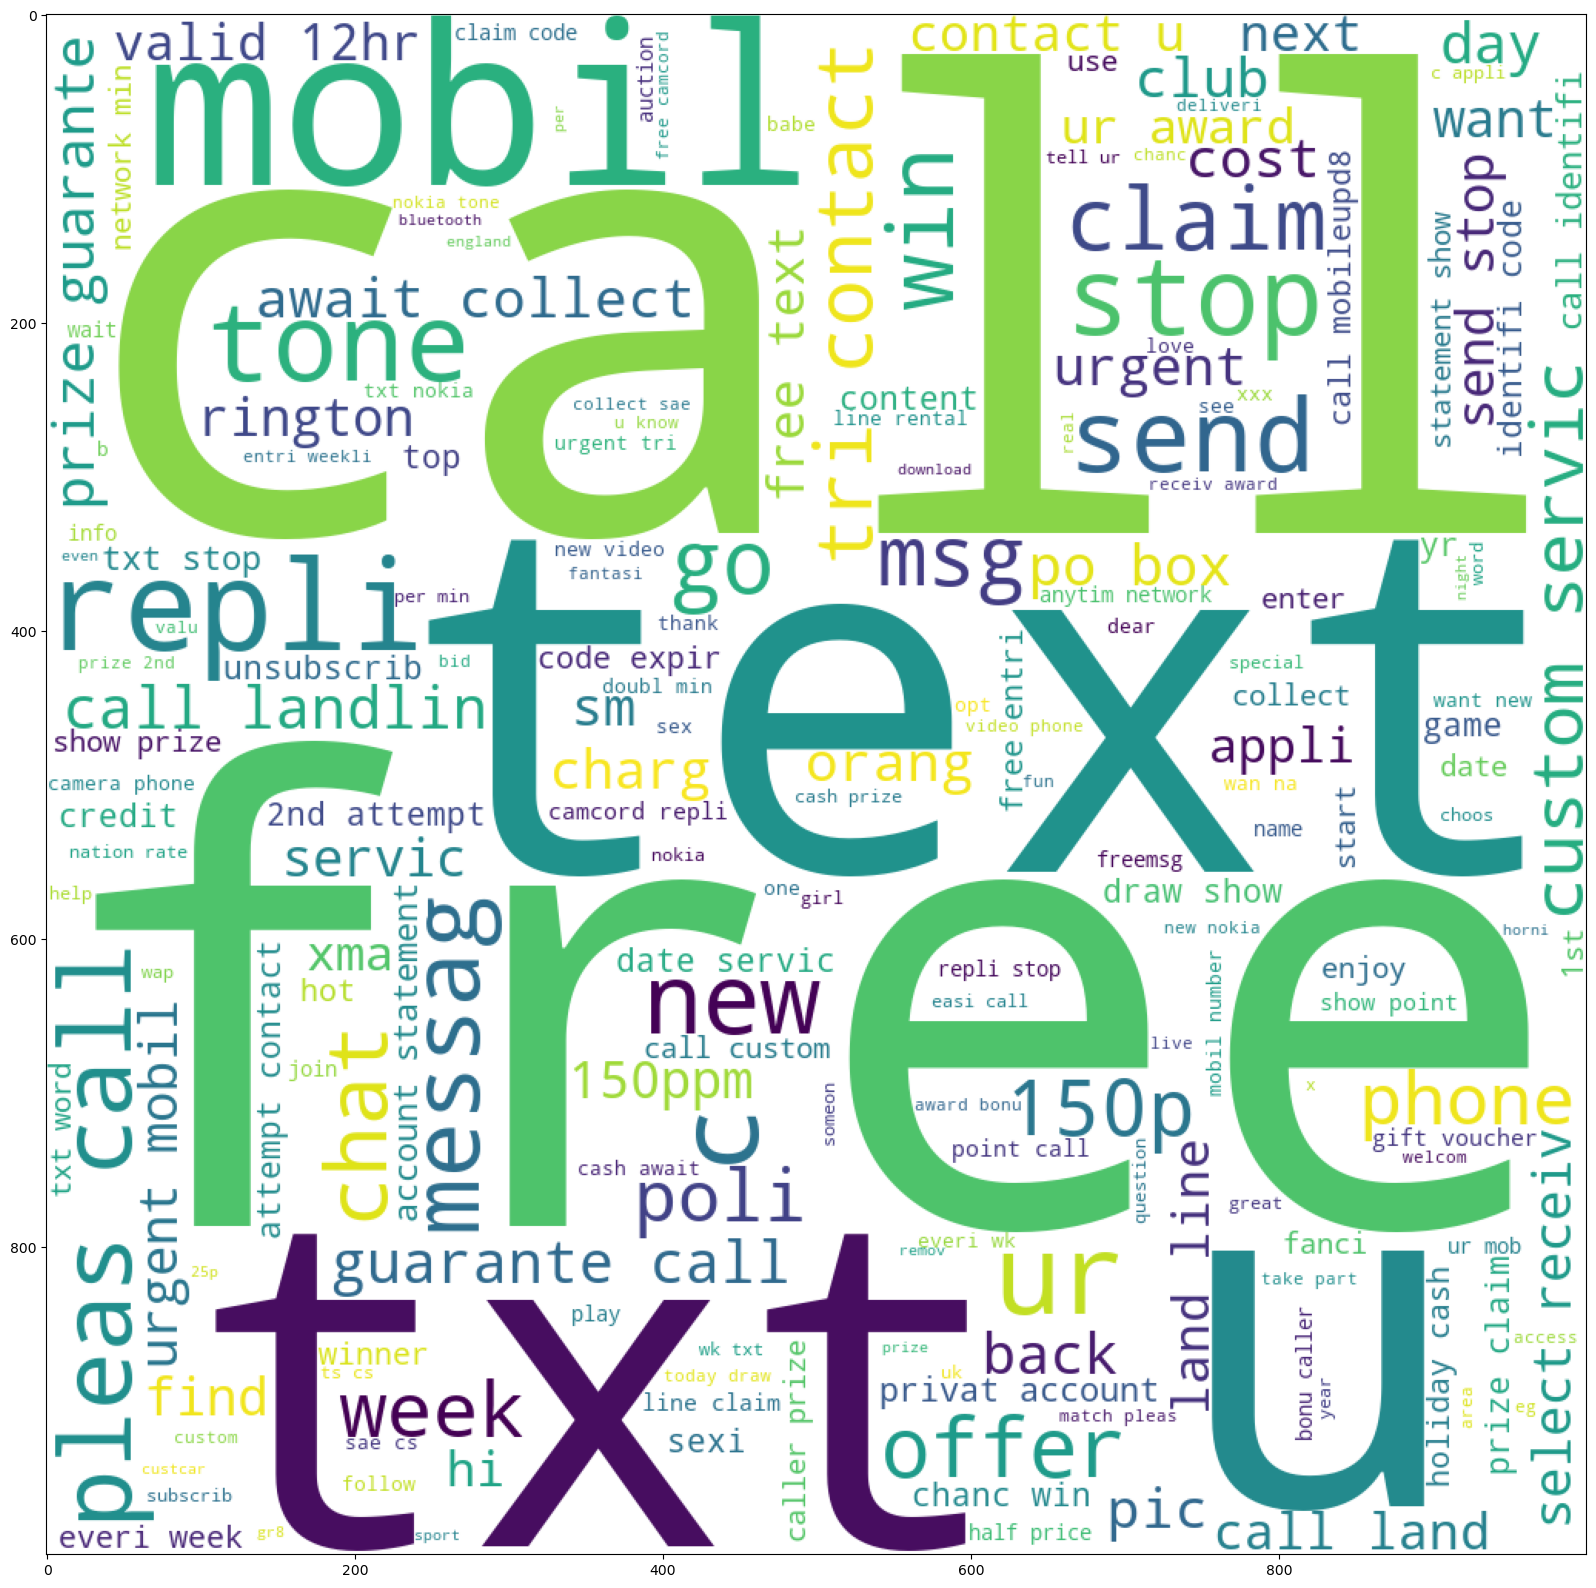

In [193]:
plt.figure(figsize=(20,20))
plt.imshow(spam)

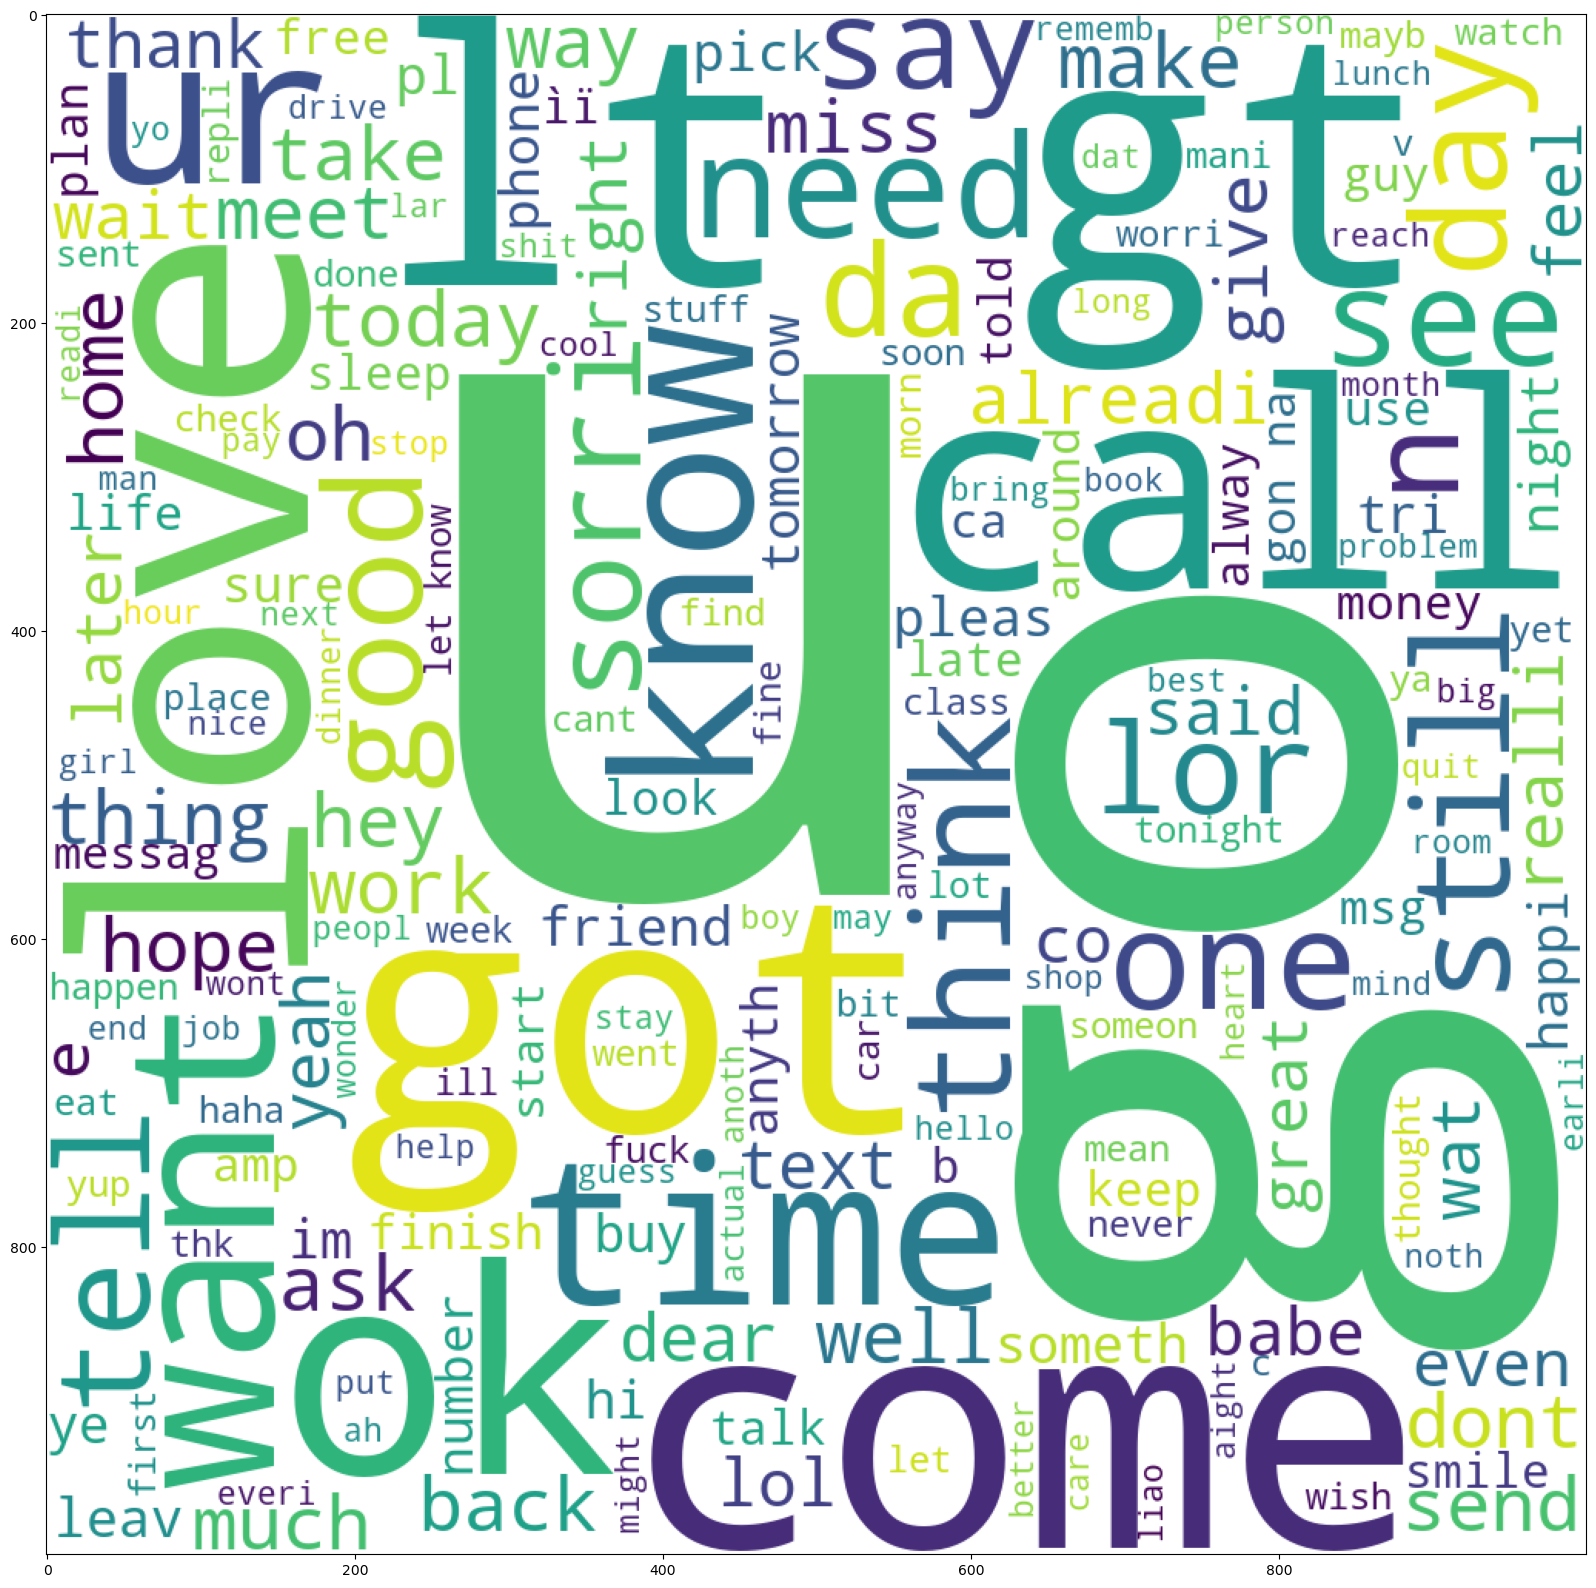

In [194]:
ham = wc.generate(df[df['target'] == 0]['cleantext'].str.cat(sep=' '))
plt.figure(figsize=(20,20))
plt.imshow(ham)

In [218]:
from collections import Counter

In [214]:
spamcorpus=[]
for msg in df[df['target']==1]['cleantext']:
    for word in msg.split():
        spamcorpus.append(word)
        
spamcorpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [220]:
Counter(spamcorpus).most_common(10)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103)]

C:\Users\NEEL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Freq')

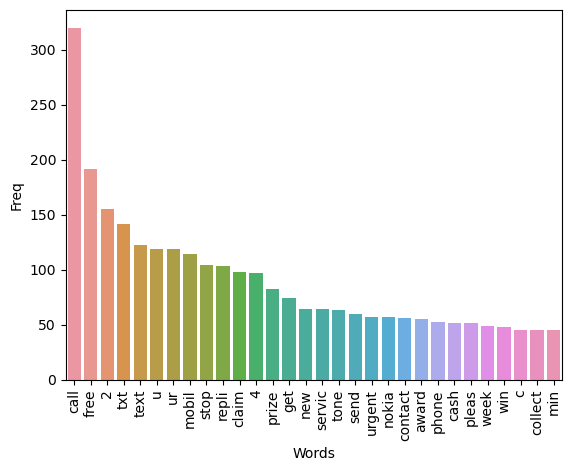

In [228]:
sns.barplot(pd.DataFrame(Counter(spamcorpus).most_common(30))[0],pd.DataFrame(Counter(spamcorpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.xlabel('Words')

plt.ylabel('Freq')

In [216]:
hamcorpus=[]
for msg in df[df['target']==0]['cleantext']:
    for word in msg.split():
        hamcorpus.append(word)
        
hamcorpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

C:\Users\NEEL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Freq')

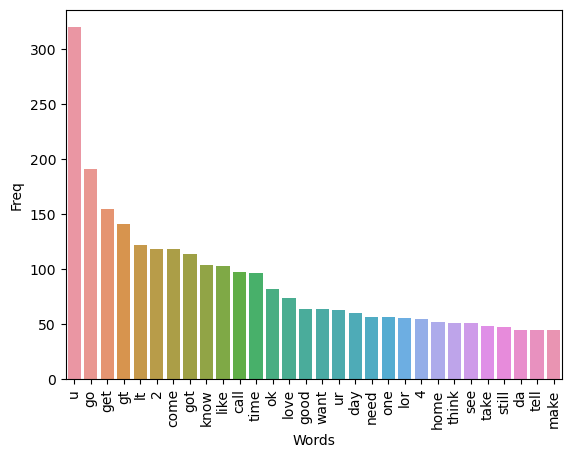

In [229]:
sns.barplot(pd.DataFrame(Counter(hamcorpus).most_common(30))[0],pd.DataFrame(Counter(spamcorpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.xlabel('Words')

plt.ylabel('Freq')

# Model Building

In [252]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [253]:
cv=CountVectorizer()
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['cleantext']).toarray()

In [254]:
X.shape

(5169, 6708)

In [255]:
y = df['target'].values

In [256]:
from sklearn.model_selection import train_test_split

In [257]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [267]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [275]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
lr = LogisticRegression(solver='liblinear',penalty='l1')
svc = SVC(kernel='sigmoid',gamma=1.0)
dtc = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=10,random_state=101)
abc = AdaBoostClassifier(n_estimators=100,random_state=101)
bc = BaggingClassifier(n_estimators=100,random_state=101)
gbc = GradientBoostingClassifier(n_estimators=100,random_state=101)
etc = ExtraTreesClassifier(n_estimators=100,random_state=101)
xgb = XGBClassifier(n_estimators=100,random_state=101)

In [276]:
ml = {
    'gnb' : gnb,
    'mnb' : mnb,
    'bnb' : bnb,
    'lr' : lr,
    'svc' : svc,
    'dtc' : dtc,
    'knn' : knn,
    'rfc' : rfc,
    'abc' : abc,
    'bc' : bc,
    'gbc' : gbc,
    'etc' : etc,
    'xgb' : xgb,
}

In [279]:
for name, algo in ml.items():
    algo.fit(X_train,y_train)
    y_pred = algo.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    print(f'\n{name} accuracy: {accuracy}')
    print(f'{name} precision: {precision}')


gnb accuracy: 0.8655705996131529
gnb precision: 0.504424778761062

mnb accuracy: 0.9506769825918762
mnb precision: 1.0

bnb accuracy: 0.9671179883945842
bnb precision: 0.9908256880733946

lr accuracy: 0.9390715667311412
lr precision: 0.875

svc accuracy: 0.960348162475822
svc precision: 0.923728813559322

dtc accuracy: 0.9226305609284333
dtc precision: 0.8351648351648352


C:\Users\NEEL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)



knn accuracy: 0.8887814313346228
knn precision: 1.0

rfc accuracy: 0.9477756286266924
rfc precision: 0.9887640449438202

abc accuracy: 0.9632495164410058
abc precision: 0.905511811023622

bc accuracy: 0.9555125725338491
bc precision: 0.8991596638655462

gbc accuracy: 0.9497098646034816
gbc precision: 0.9320388349514563

etc accuracy: 0.9671179883945842
etc precision: 0.9819819819819819

xgb accuracy: 0.9642166344294004
xgb precision: 0.9262295081967213


In [280]:
import pickle

In [281]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))